<a href="https://colab.research.google.com/github/min207/ESAA/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**데이터 불러오기**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
#한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font',family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,240 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

-----------------------------------------------
##**데이터 탐색**

In [4]:
train = pd.read_csv("movies_train.csv")
train.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083


In [5]:
test = pd.read_csv("movies_test.csv")
test.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


- dir_prev_bfnum 결측치가 절반 이상
- release_time이 object 타입 > datetime으로 변환하여 연.월.일 / 계절 추출

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


- train 데이터와 마찬가지로 dir_prev_bfnum, release_time 전처리 필요

In [8]:
train[(train.dir_prev_bfnum.isnull()==True) & (train.dir_prev_num==0)].director.value_counts()

홍상수     6
전규환     4
장률      4
노진수     4
신연식     3
       ..
강우석     1
권우정     1
윤태식     1
태미 추    1
백운학     1
Name: director, Length: 270, dtype: int64

In [9]:
test[(test.dir_prev_bfnum.isnull()==True) & (test.dir_prev_num==0)].director.value_counts()

조성규      3
전규환      2
민병훈      2
조정래      2
김미연      2
        ..
민용근      1
박수민      1
이상우      1
스티브 리    1
이전       1
Name: director, Length: 126, dtype: int64

- 감독의 첫 작품이어서 관객수가 결측치인 듯..? > 근데 여러개 있는데 왜 전 작품 수가 0으로 나오지

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffaa9327460>,
      dtype=object)

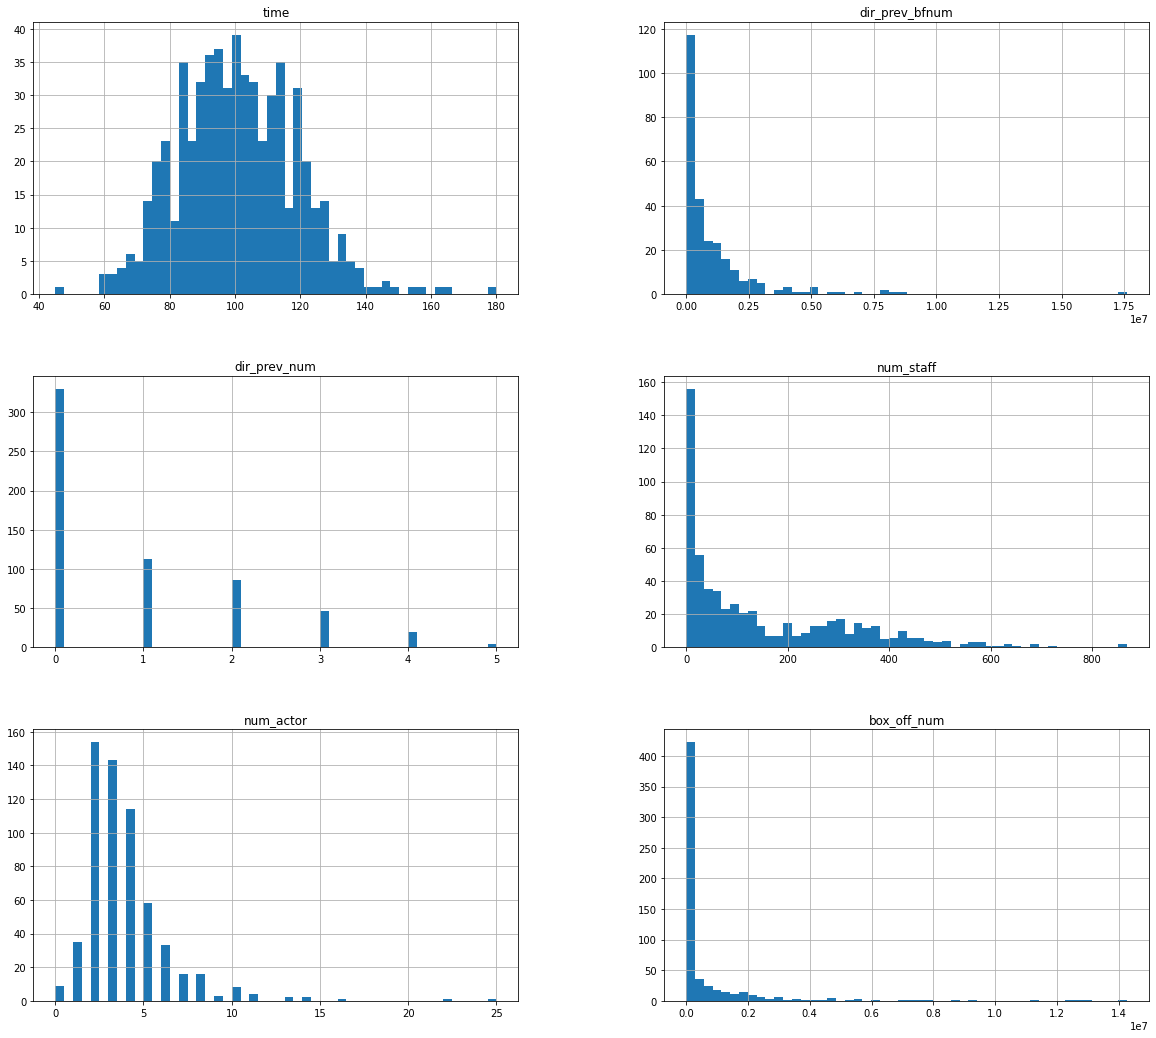

In [10]:
train.hist(bins=50, figsize=(20,18))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffaa8ddb7c0>,
      dtype=object)

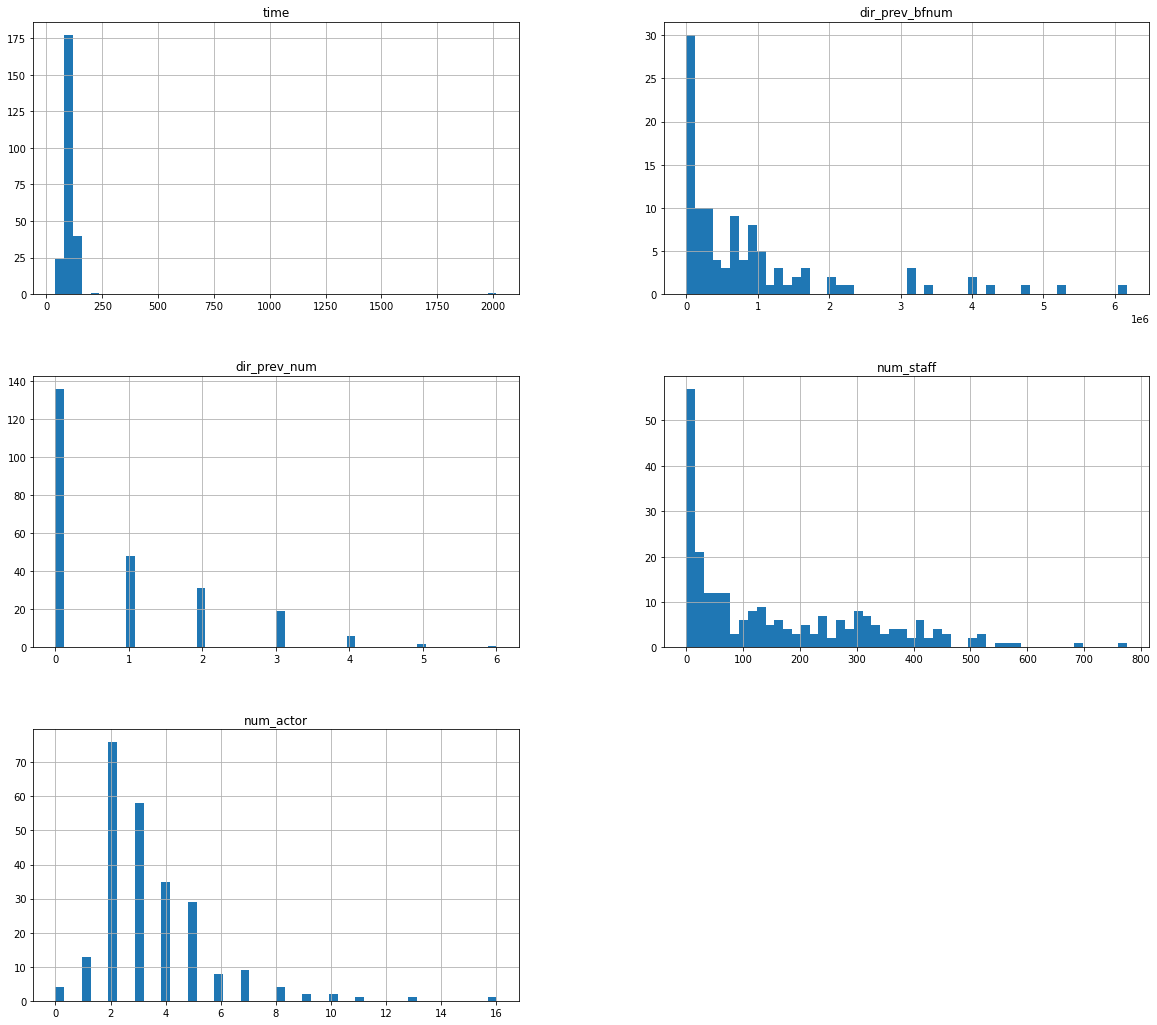

In [11]:
test.hist(bins=50, figsize=(20,18))

- dir_prev_bfnum: 결측치 너무 많아서 삭제
- dir_prev_num: 그냥 냅두기
- num_staff: 로그변환 고려
- num_actor: 이상치 제거(15이상?)
- box_off_num: 타겟값

In [12]:
train.distributor.value_counts().head(10)

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
인디스토리        26
골든타이드픽처스     15
(주) 케이알씨지    14
(주) 영화사조제    10
영화사 진진       10
Name: distributor, dtype: int64

In [13]:
test.distributor.value_counts().head(10)

CJ 엔터테인먼트    31
롯데엔터테인먼트     24
(주)마운틴픽쳐스    14
(주)쇼박스       12
골든타이드픽처스     12
인디스토리        11
(주)NEW        6
KT&G 상상마당     6
(주)키노아이       5
(주) 케이알씨지     5
Name: distributor, dtype: int64

- 10개 이하의 영화를 가진 배급사는 기타로 통합

In [14]:
train.genre.value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

In [15]:
test.genre.value_counts()

드라마       78
멜로/로맨스    39
다큐멘터리     33
코미디       23
액션        21
공포        19
느와르       12
애니메이션      8
미스터리       7
서스펜스       1
뮤지컬        1
SF         1
Name: genre, dtype: int64

- 장르는 인코딩만 수행

In [16]:
train.screening_rat.value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

In [17]:
test.screening_rat.value_counts()

청소년 관람불가    93
15세 관람가     73
12세 관람가     40
전체 관람가      37
Name: screening_rat, dtype: int64

- 상영등급은 인코딩만 수행

In [18]:
train.director.value_counts()

홍상수           7
장률            4
신재호           4
우민호           4
노진수           4
             ..
권오광           1
한윤선           1
박찬경           1
New Pistol    1
백운학           1
Name: director, Length: 472, dtype: int64

In [19]:
test.director.value_counts()

조성규    3
이정호    3
김형준    2
김태균    2
김미연    2
      ..
최진성    1
김대승    1
임태형    1
박흥식    1
이전     1
Name: director, Length: 220, dtype: int64

- 감독의 종류가 지나치게 많음(472/600, 220,243) > 제거

--------------------------------------------------

##**데이터 전처리**

In [20]:
train_df = train.copy()
test_df = test.copy()

In [21]:
# 불필요한 칼럼 제거
train_df.drop(columns=['title','director'], axis=1, inplace=True)
test_df.drop(columns=['title','director'], axis=1, inplace=True)

In [22]:
# release_time 타입 변환
train_df['release_time']=pd.to_datetime(train_df['release_time'])
test_df['release_time']=pd.to_datetime(test_df['release_time'])

# 계절 함수 생성
def season(x):
  if ((x>=3) & (x<=5)):
    return 'spring'
  elif ((x>=6) & (x<=8)):
    return 'summer'
  elif ((x>=9) & (x<=11)):
    return 'fall'
  else:
    return 'winter'

# 계절, 월, 일에 대한 칼럼 생성
train_df['day'] = train_df['release_time'].dt.day
test_df['day'] = test_df['release_time'].dt.day
train_df['month'] = train_df['release_time'].dt.month
test_df['month'] = test_df['release_time'].dt.month

train_df['season'] = train_df['month'].apply(season)
test_df['season'] = test_df['month'].apply(season)

In [23]:
# release_time 칼럼 삭제
train_df.drop(columns=['release_time'],axis=1, inplace=True)
test_df.drop(columns=['release_time'],axis=1, inplace=True)

In [24]:
# dir_prev_bfnum 칼럼 삭제, 이거 처리 방법 다시 얘기해봐야할 듯
train_df.drop(columns=['dir_prev_bfnum'], axis=1, inplace=True)
test_df.drop(columns=['dir_prev_bfnum'], axis=1, inplace=True)

In [25]:
# 10 이하 영화를 가진 distributor '기타'로 통합
def distributor(x):
  if x in d_list:
    return x
  else:
    return '기타'

d_list = train_df.distributor.value_counts()[:8]

train_df['distributor'] = train_df['distributor'].apply(distributor)
test_df['distributor'] = test_df['distributor'].apply(distributor)

In [26]:
# 스텝 수, 배우 수 로그 변환
train_df['num_staff'] = np.log1p(train_df['num_staff'])
test_df['num_staff'] = np.log1p(test_df['num_staff'])
train_df['num_actor'] = np.log1p(train_df['num_actor'])
test_df['num_actor'] = np.log1p(test_df['num_actor'])

In [27]:
# 원핫인코딩 수행
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [29]:
# 타겟값도 로그변환
train_df['box_off_num'] = np.log1p(train_df['box_off_num'])

-----------------------------------
##**회귀 모델 적용**

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [34]:
# 5폴드 교차검증
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [35]:
X = train_df.drop(columns=['box_off_num'], axis=1)
y = train_df.box_off_num

In [36]:
# LightGBM
lgbm = LGBMRegressor(random_state=0)

rmse_list = []
lgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    lgbm.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(test_df)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    lgb_pred += (sub_pred / 10)

np.mean(rmse_list)

1127797.380617241

In [38]:
# XGBoost
xgb = XGBRegressor(random_state=0)

rmse_list = []
xgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    xgb.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in xgb.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in xgb.predict(test_df)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    xgb_pred += (sub_pred / 10)

np.mean(rmse_list)

[08:48:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1121307.3109473542

In [40]:
# RandomForest
rf = RandomForestRegressor(random_state=0)

rmse_list = []
rf_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    rf.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in rf.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in rf.predict(test_df)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    rf_pred += (sub_pred / 10)
                               
np.mean(rmse_list)

859287.7825250744

In [44]:
# 결과 블렌딩
preds = (lgb_pred + xgb_pred + rf_pred)/3

In [57]:
# 파일 내보내기
sub = pd.read_csv('submission.csv')
sub['box_off_num'] = preds.astype('int64')
sub.to_csv('project3.csv', index=False)

##**모델 적용 2번째**

In [58]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, ' 로그 변환된 RMSE:', np.round(rmse, 3))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [59]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = train_df['box_off_num']
X_features = train_df.drop('box_off_num',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=0)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression  로그 변환된 RMSE: 2.204
Ridge  로그 변환된 RMSE: 2.204
Lasso  로그 변환된 RMSE: 2.752


[2.2040690742448943, 2.2038420767528017, 2.7519040344397676]

In [60]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
  
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [2.05  2.07  2.143 1.965 1.97 ]
LinearRegression CV 평균 RMSE 값: 2.04

Ridge CV RMSE 값 리스트: [2.052 2.065 2.123 1.968 1.971]
Ridge CV 평균 RMSE 값: 2.036

Lasso CV RMSE 값 리스트: [2.474 2.416 2.338 2.769 2.418]
Lasso CV 평균 RMSE 값: 2.483


In [61]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 2.0362, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 2.0357, 최적 alpha:{'alpha': 0.005}


In [62]:
# 앞의 최적화 alpha 값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.005)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression  로그 변환된 RMSE: 2.204
Ridge  로그 변환된 RMSE: 2.218
Lasso  로그 변환된 RMSE: 2.201


[2.2040690742448943, 2.2183505099602603, 2.2010800215141337]

In [65]:
pred1 = np.expm1(lasso_reg.predict(test_df))

In [67]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))


xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)

[09:14:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최종 혼합 모델의 RMSE: 2.1228935264070756
XGBM 모델의 RMSE: 2.132756074132078
LGBM 모델의 RMSE: 2.1653317226059254


In [68]:
pred2 = np.expm1(xgb_reg.predict(test_df)*0.5 + lgbm_reg.predict(test_df)*0.5)